In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline

from skimage import color, io
from skimage.transform import rescale
import time
import tqdm

In [2]:
def generate_object(num_angles=3, convex=True):
    angles = np.random.random(num_angles).cumsum()
    angles = (angles / angles[-1]) * np.pi * 2
    if convex:
        xs, ys = np.cos(angles) * 2, np.sin(angles) * 2
    else:
        coefs = np.random.random(num_angles) + 1
        xs, ys = coefs * np.cos(angles), coefs * np.sin(angles)
    for i in range(len(xs)):
        ip1, ip2 = (i + 1) % len(xs), (i + 2) % len(xs)
        vec1 = np.array([xs[ip1]-xs[i], ys[ip1]-ys[i]])
        vec2 = np.array([xs[ip2]-xs[ip1], ys[ip2]-ys[ip1]])
        cos = np.inner(vec1, vec2) / \
            (np.linalg.norm(vec1) * np.linalg.norm(vec2))
        dist = np.linalg.norm(vec1)
        if np.abs(cos) > 0.89 or dist < 0.5:
            return generate_object(num_angles, convex)
    return xs, ys

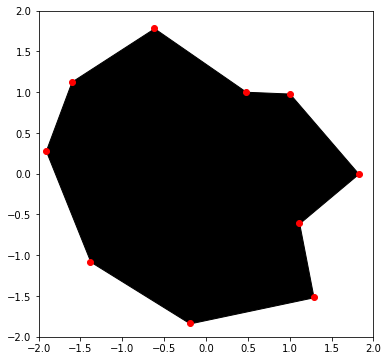

In [3]:
xs, ys = generate_object(num_angles=10, convex=False)

N = np.stack((xs, ys)).transpose(1, 0)
patches = [Polygon(N)]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
p = PatchCollection(patches, alpha=1, color="k")
ax.add_collection(p)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
ax.plot(xs, ys, "ro", color="r")
plt.show()

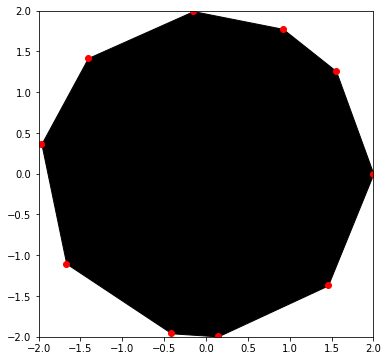

In [4]:
xs, ys = generate_object(num_angles=10, convex=True)

N = np.stack((xs, ys)).transpose(1, 0)
patches = [Polygon(N)]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
p = PatchCollection(patches, alpha=1, color="k")
ax.add_collection(p)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
ax.plot(xs, ys, "ro", color="r")
plt.show()

In [4]:
# generate 3000 train and 200 test examples for each class

images = [[] for i in range(8)]
labels = [[] for i in range(8)]
for j in tqdm.tqdm(range(8)):
    for i in range(3200):
        xs, ys = generate_object(num_angles=j+3, convex=False)
        N = np.stack((xs, ys)).transpose(1, 0)
        patches = [Polygon(N)]

        fig, ax = plt.subplots(1, 1, figsize=(3, 3))
        p = PatchCollection(patches, alpha=1, color="k")
        ax.add_collection(p)

        plt.xlim([-2, 2])
        plt.ylim([-2, 2])
        plt.axis("off")
        plt.savefig("fig.png", dpi=300)
        plt.close(fig)

        img = color.rgb2gray(io.imread("fig.png"))
        img = rescale(img, 0.5)
        images[j].append(1-img)
        
        fig, ax = plt.subplots(1, 1, figsize=(3, 3))
        plt.xlim([-2, 2])
        plt.ylim([-2, 2])
        ax.scatter(xs, ys, color="k", s=8)
        plt.axis("off")
        plt.savefig("fig.png", dpi=300)
        plt.close(fig)

        img = color.rgb2gray(io.imread("fig.png"))
        img = rescale(img, 0.5)
        img_ = (img < 0.01).astype(np.int)
        labels[j].append(img_)

  0%|          | 0/8 [00:00<?, ?it/s]/home/ohrinchuk/miniconda3/envs/torch/lib/python3.7/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/ohrinchuk/miniconda3/envs/torch/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ohrinchuk/miniconda3/envs/torch/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|██████████| 8/8 [1:56:58<00:00, 868.44s/it]


In [8]:
data = np.array(images).astype(np.bool)
labl = np.array(labels).astype(np.bool)

train = data[:,:3000].reshape(-1, 450, 450)
labl_ = labl[:,:3000].reshape(-1, 450, 450)
labels_ = np.repeat(np.arange(8), 3000)
np.savez("data/segment3k/train.npz", data=train, labels=labels_, masks=labl_)

test = data[:,3000:3200].reshape(-1, 450, 450)
labl_ = labl[:,3000:3200].reshape(-1, 450, 450)
labels_ = np.repeat(np.arange(8), 200)
np.savez("data/segment3k/test.npz", data=test, labels=labels_, masks=labl_)

In [58]:
images = [[] for i in range(8)]
for j in tqdm.tqdm(range(8)):
    for i in range(1200):
        xs, ys = generate_object(num_angles=j+3, convex=False)
        N = np.stack((xs, ys)).transpose(1, 0)
        patches = [Polygon(N)]

        fig, ax = plt.subplots(1, 1, figsize=(3, 3))
        p = PatchCollection(patches, alpha=1, color="k")
        ax.add_collection(p)

        plt.xlim([-2, 2])
        plt.ylim([-2, 2])
        plt.axis("off")
        plt.savefig("fig.png", dpi=300)
        plt.close(fig)

        img = color.rgb2gray(io.imread("fig.png"))
        img = rescale(img, 0.5)
        images[j].append(1-img)

100%|██████████| 8/8 [21:52<00:00, 165.06s/it]


In [9]:
tr = np.load("data/segment3k/test.npz")
tr_dat, tr_lab = tr["data"], tr["labels"]

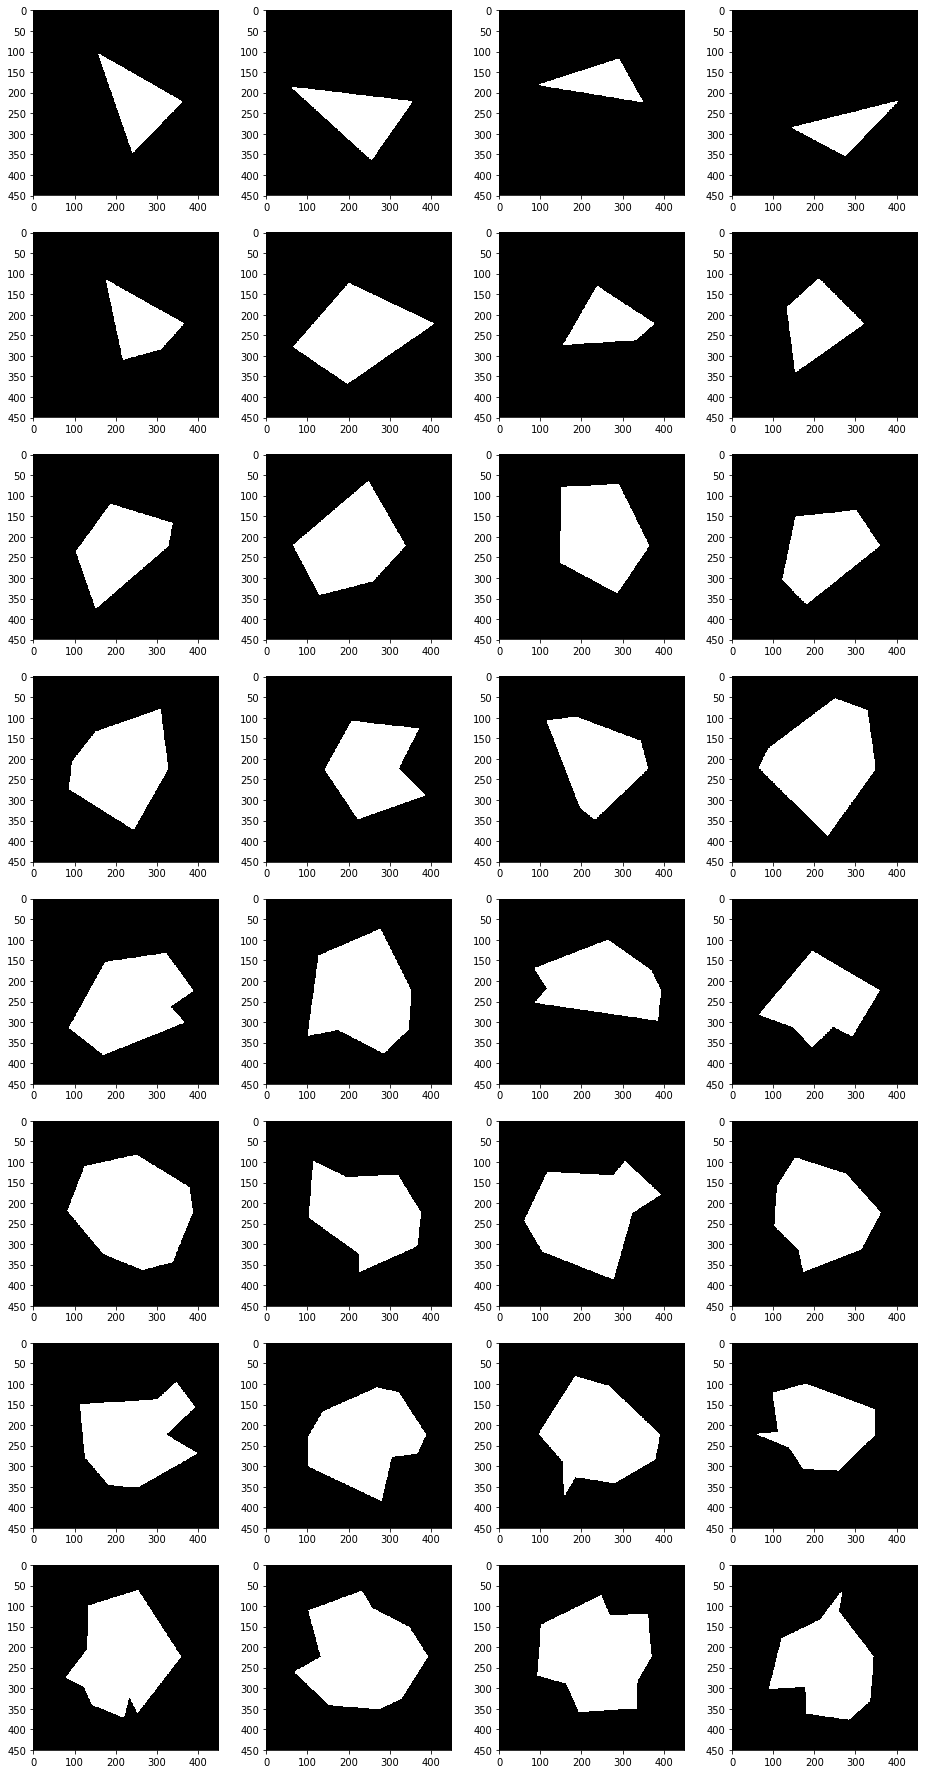

In [10]:
fig, ax = plt.subplots(8, 4, figsize=(16, 32))
for i in range(8):
    for j in range(4):
        idx = np.random.randint(200) + 200 * i
        ax[i,j].imshow(tr_dat[idx], cmap="gray")

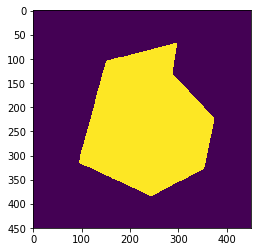

In [11]:
plt.imshow(tr_dat[900])

In [277]:
def get_neighbors(i, j):
    candidates = [
        (0, 1), (1, 1), (1, 0), (1, -1),
        (0, -1), (-1, -1), (-1, 0), (-1, 1)]
    xs, ys = [], []
    for p in candidates:
        x, y = i + p[0], j + p[1]
        if (x >= 0 and x < 450 and y >= 0 and y < 450):
            xs.append(x)
            ys.append(y)
    return xs, ys

In [331]:
img = tr_dat[900]
new_img = np.zeros_like(img)
start_point = None
for i in range(450):
    for j in range(450):
        ns = get_neighbors(i, j)
        if img[ns].sum() < len(ns[0]) and img[ns].sum() > 3:
            new_img[i, j] = 1
            if start_point is None:
                start_point = (i, j)

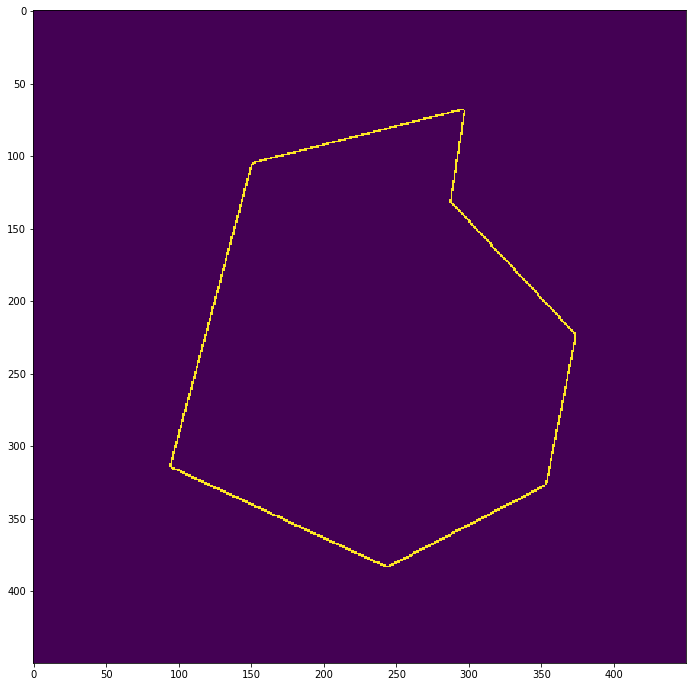

In [332]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(new_img)